# importing necessary libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# loading dataset

In [5]:
pd.set_option('display.max_columns', None) #display all the columns
df = pd.read_csv('Data_sets/water_potability.csv')

# initial inspection

In [7]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [8]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# handling missing values



# finding missing values

In [14]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
df['ph'].value_counts()

ph
3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: count, Length: 2785, dtype: int64

# checking portability

In [17]:
df['Potability'].mode()[0]

0

In [18]:
df['Potability'].mean()

0.3901098901098901

In [19]:
df['Potability'].median()

0.0

# making a numerical column (not necessary since all values are int or float type)

In [21]:
numerical_columns = df.select_dtypes(exclude = ['category','object']).columns

In [22]:
numerical_columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# checking outliers

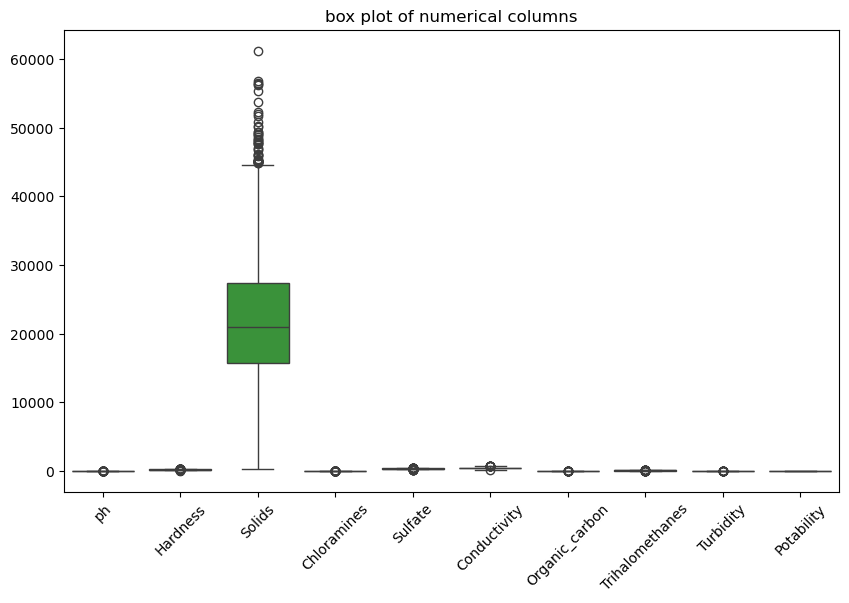

In [24]:
# box plot analysis
plt.figure(figsize = (10,6))
sns.boxplot(data=df)
plt.xticks(rotation = 45)
plt.title('box plot of numerical columns')
plt.show()

# separately printing each column for outlier

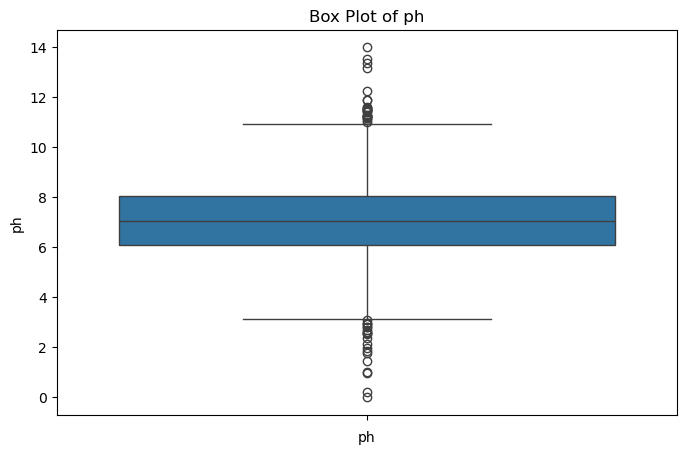

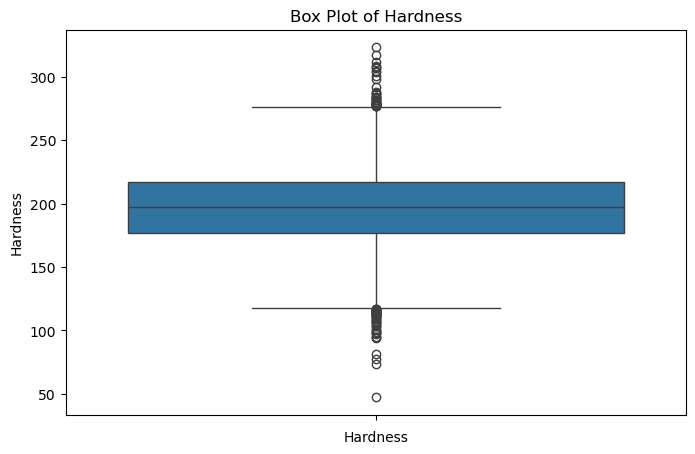

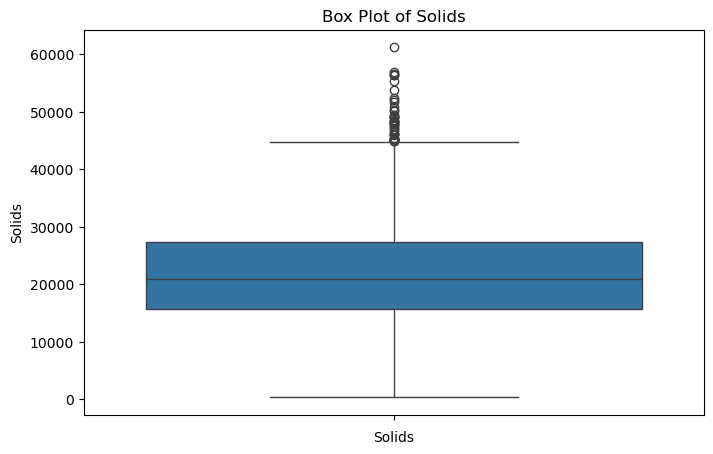

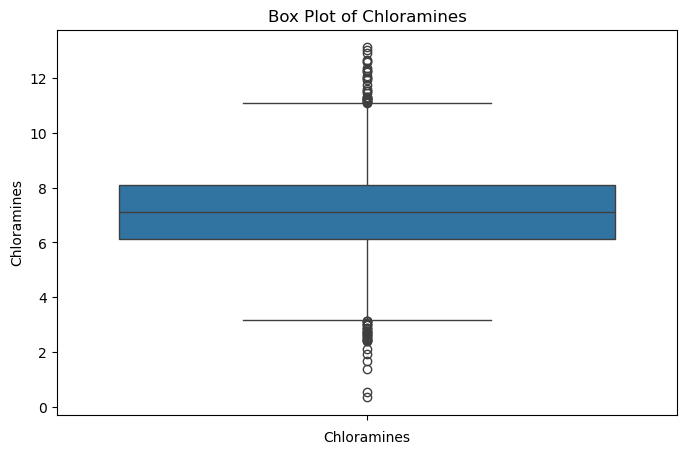

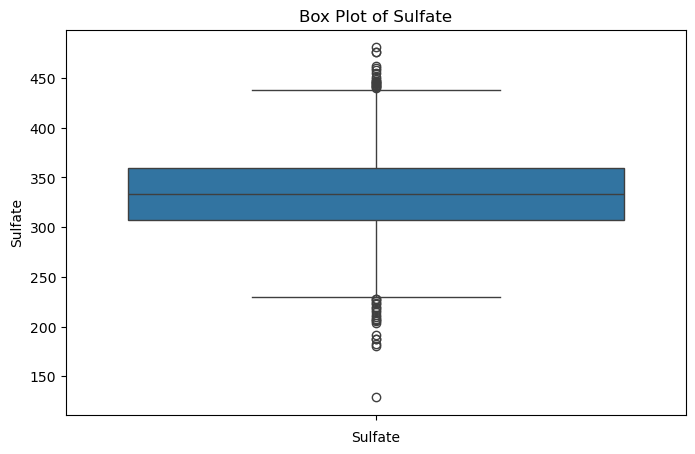

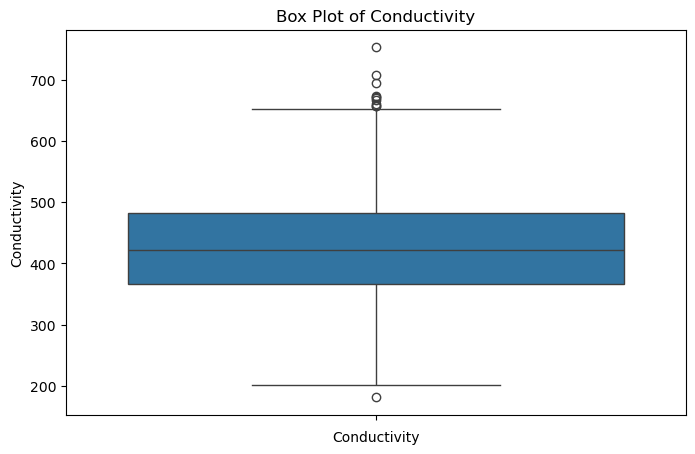

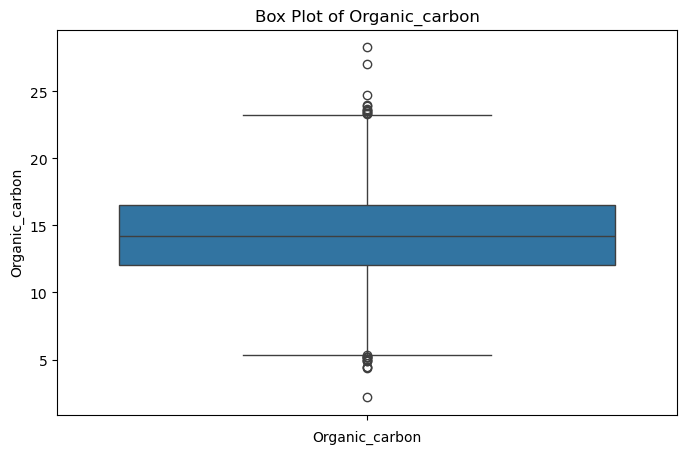

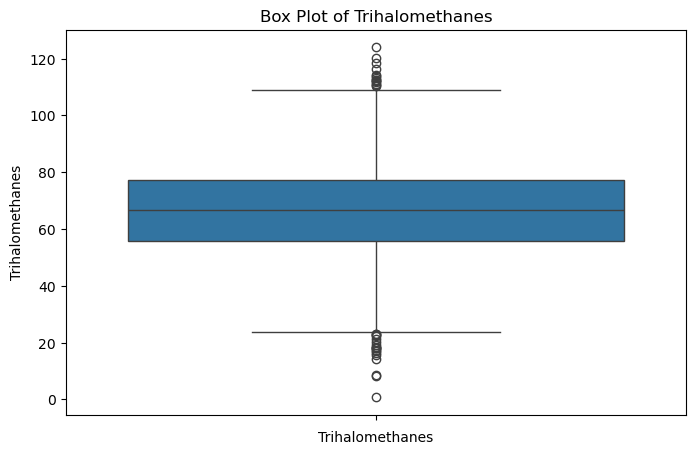

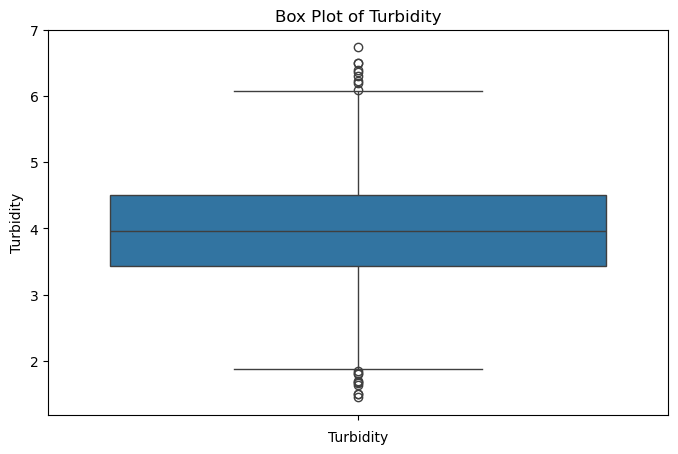

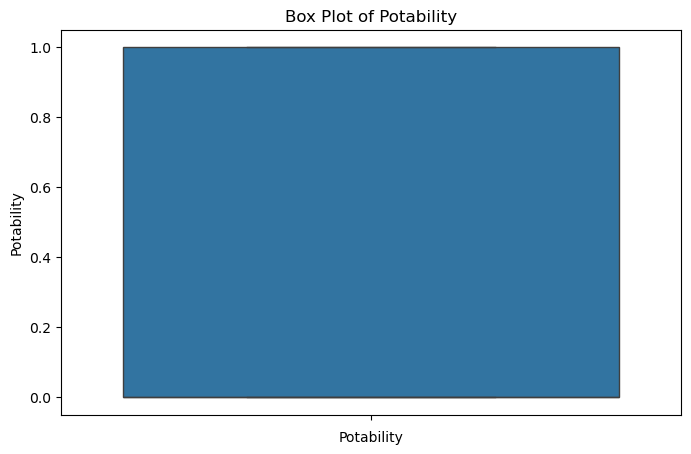

In [26]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# checking if the distribution is normal or not through visual representation

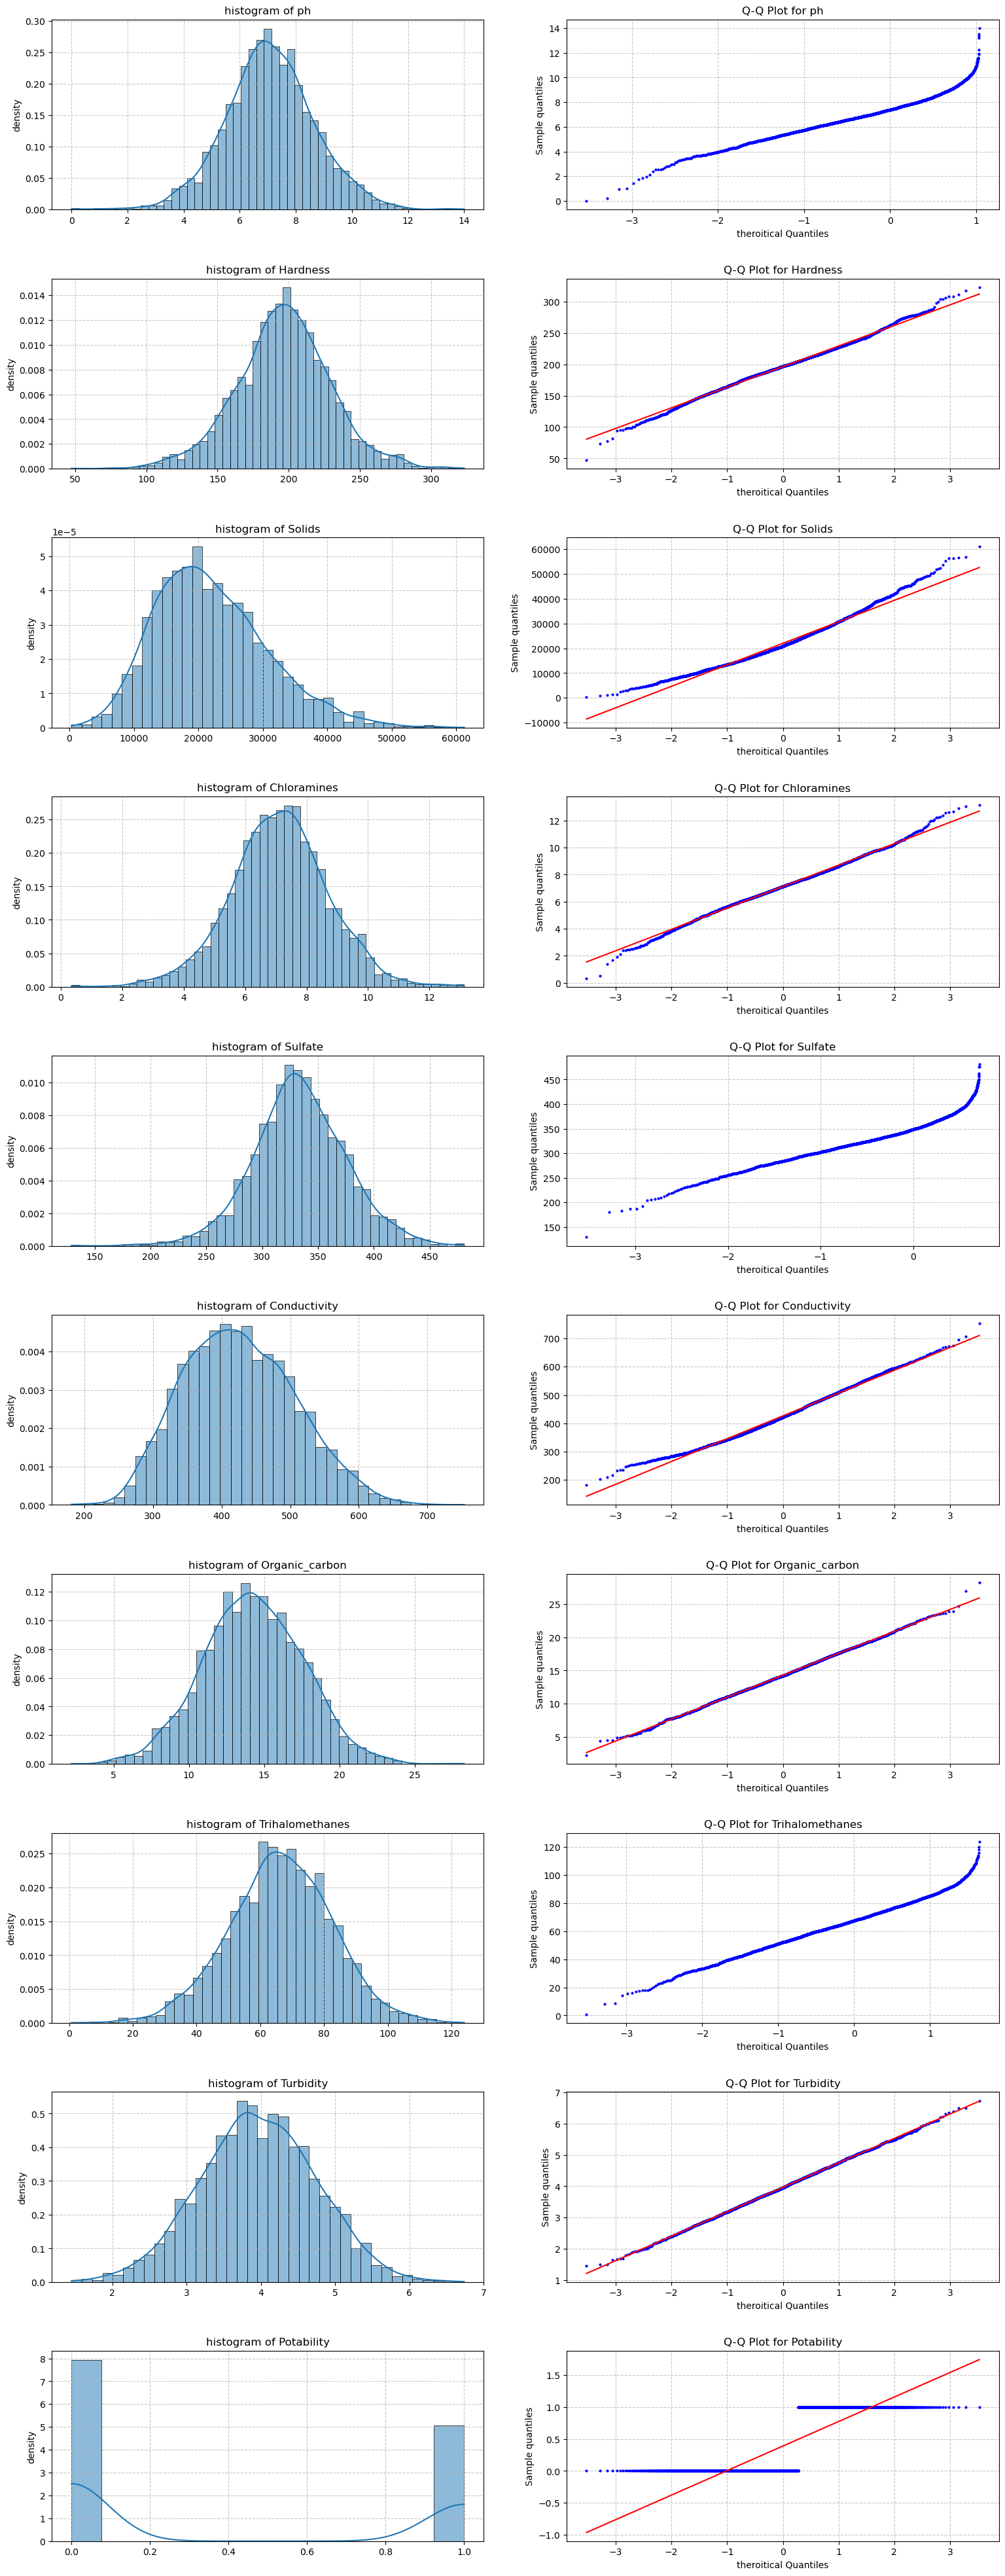

In [28]:
#create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols*4))

#plotting histograms and Q-Q plots for each umerical column
for i,col in enumerate(numerical_columns):
    #histogram on the left subplot
    sns.histplot(df[col],kde=True ,ax=axes[i,0], stat='density', linewidth = 0.5)
    axes[i , 0].set_title(f'histogram of {col}') 
    axes[i,0].set_xlabel('')
    axes[i,0].set_ylabel('density')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)

    #Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i,1], dist='norm', fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0) # adjust marker size for clarity
    axes[i,1].grid(True, linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot for {col}')
    axes[i,1].set_xlabel('theroitical Quantiles')
    axes[i,1].set_ylabel('Sample quantiles')

#adjust layout and display display the plots
plt.tight_layout(pad=3.0)
plt.show()

# further verifying the distribution through statistical tests

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors  # Corrected import


# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')


# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)

Column: ph
Shapiro-Wilk Test: Statistics=nan, p-value=nan
Shapiro-Wilk Test: ph does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=nan
Anderson-Darling Test: Critical Values: [0.575 0.655 0.786 0.917 1.091]
Anderson-Darling Test: ph does not look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=nan, p-value=nan
Jarque-Bera Test: ph does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=nan, p-value=nan
D'Agostino and Pearson's Test: ph does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=nan, p-value=nan
Kolmogorov-Smirnov Test: ph does not look normally distributed (reject H0)
Lilliefors Test: Statistics=nan, p-value=nan
Lilliefors Test: ph does not look normally distributed (reject H0)


Column: Hardness
Shapiro-Wilk Test: Statistics=0.996, p-value=0.000
Shapiro-Wilk Test: Hardness does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=3.573
Anderso

# checking correlation matrix

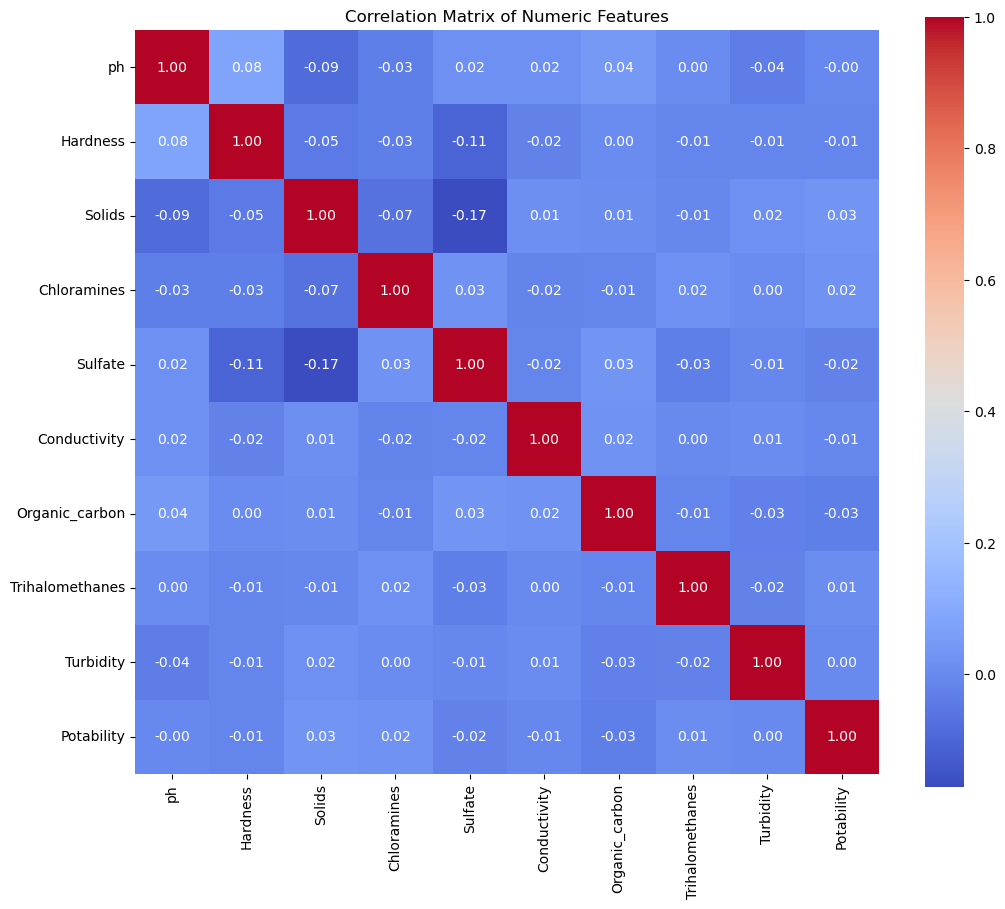

In [32]:
numeric_data = df

#compute pairwise correlation of numeric columns
correlation_matrix = numeric_data.corr()

#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# calculating z-score

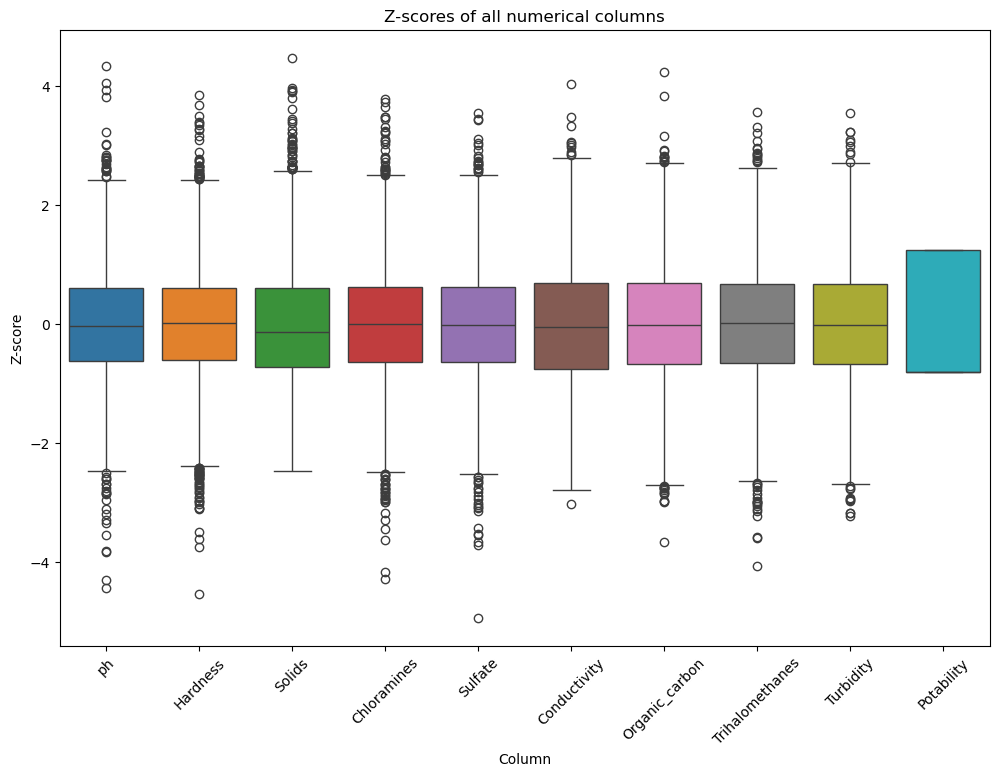

In [34]:
# Calculate z-scores
z_scores = (df - df.mean()) / df.std()

# Plot z-scores
plt.figure(figsize=(12, 8))
sns.boxplot(data=z_scores)
plt.title('Z-scores of all numerical columns')
plt.xticks(rotation=45)
plt.ylabel('Z-score')
plt.xlabel('Column')
plt.show()

# function to detect outliers

In [36]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}: {is_outlier}")
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")

Outliers detected using IQR method:
ph: True
Hardness: True
Solids: True
Chloramines: True
Sulfate: True
Conductivity: True
Organic_carbon: True
Trihalomethanes: True
Turbidity: True
Potability: False

Outliers detected using Z-score method:
ph: True
Hardness: True
Solids: True
Chloramines: True
Sulfate: True
Conductivity: True
Organic_carbon: True
Trihalomethanes: True
Turbidity: True
Potability: False


# removing outliers

In [38]:
def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            cleaned_data = cleaned_data[z_scores <= threshold]

    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("\nDataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)


DataFrame after removing outliers using Z-score method:
             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3265   8.197353  203.105091  27701.794055     6.472914  328.886838   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25120\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25120\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25120\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25120\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25120\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\ASUS\AppData\Loc

# filling missing values

In [40]:
df = df.fillna(df.median())
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [41]:
df.to_csv('Data_sets/waterfiltered_data.csv',index=False)

# loading and working with filtered data set

In [9]:
data = pd.read_csv('Data_sets/waterfiltered_data.csv')
#display the first few rows and columns
pd.set_option('display.max_columns',None) #this
print("first few rows of data:")
print(data.head())

first few rows of data:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


# implementing model using logistic regression

Training Accuracy: 0.61
Testing Accuracy: 0.63
Confusion Matrix:
[[412   0]
 [244   0]]


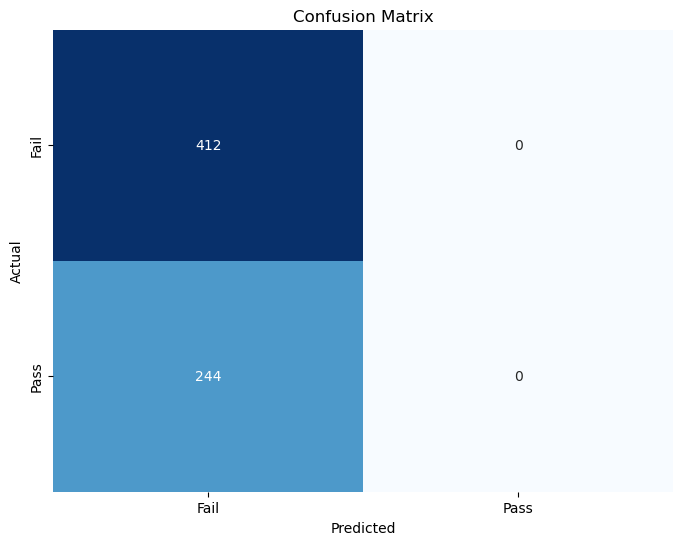

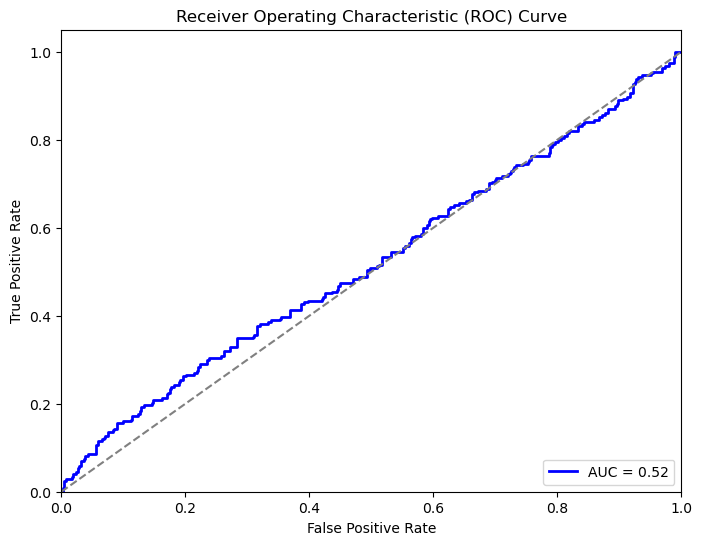

FileNotFoundError: [Errno 2] No such file or directory: 'ML_MODlogiEL/logistic_regression_model.pkl'

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model


final_data = data

# Extract features (X) and target variable (y)
X = final_data.drop('Potability', axis=1)
y = final_data['Potability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize logistic regression model
model = LogisticRegression(max_iter = 10000)

# Fit the model
model.fit(X_train, y_train)


# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODlogiEL/logistic_regression_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


# implementing model using logistic regression G-Naive Bayes

Training Accuracy: 0.63
Testing Accuracy: 0.63
Confusion Matrix:
[[360  52]
 [192  52]]


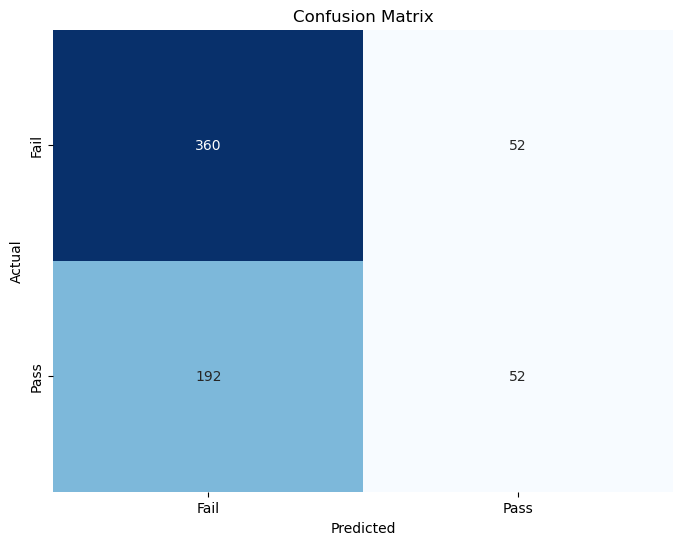

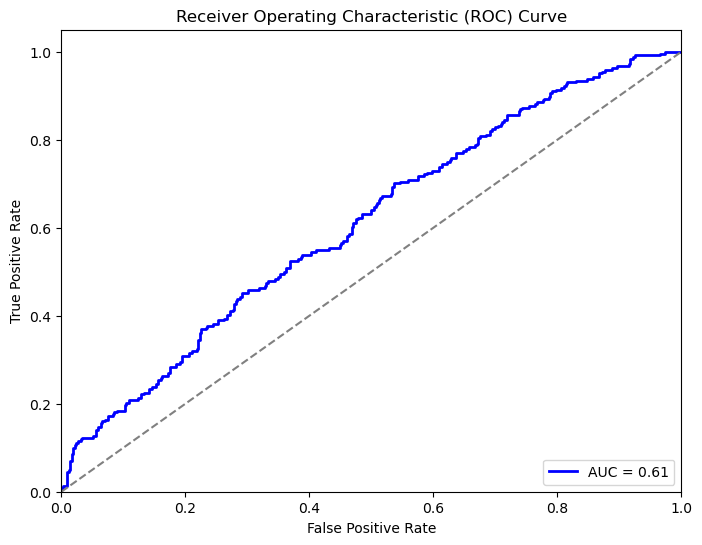

Model saved at ML_MODEL/naive_bayes_model.pkl


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model




# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)






# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/naive_bayes_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# implementing model using KNN model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model




# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)





# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# implementing model using random forest classifier

Training Accuracy: 1.00
Testing Accuracy: 0.67
Confusion Matrix:
[[350  62]
 [152  92]]


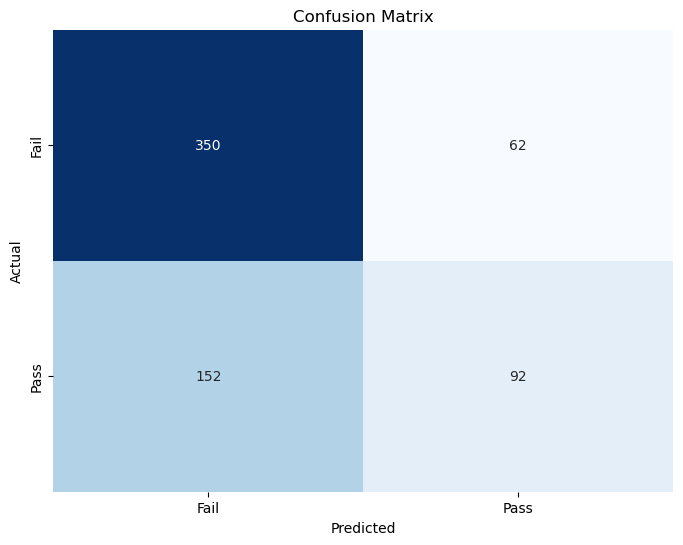

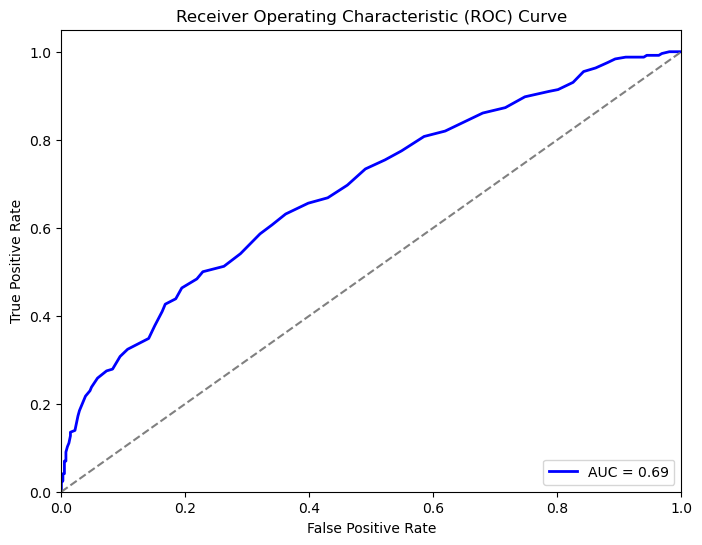

Model saved at ML_MODEL/random_forest_model.pkl


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)




# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# implementing model using decision tree classifier

Training Accuracy: 1.00
Testing Accuracy: 0.58
Confusion Matrix:
[[254 158]
 [120 124]]


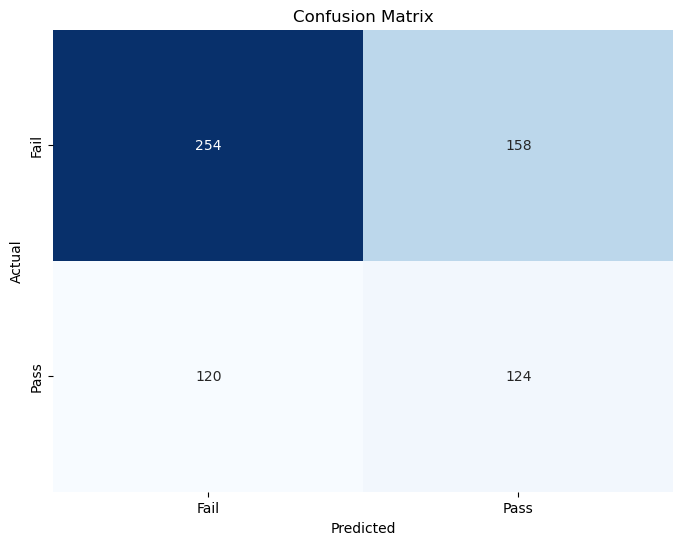

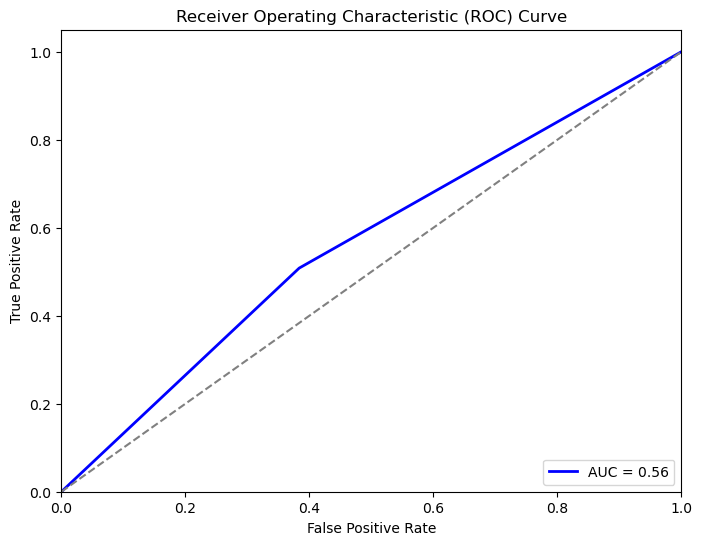

Model saved at ML_MODEL/decision_tree_model.pkl


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')